# Week 2 Project: Statistical Analysis Dashboard

## 🎯 Project Goal
Build a statistical analysis dashboard for portfolio returns analysis.

## Skills Applied
- Descriptive statistics
- Distribution analysis
- Statistical testing
- Correlation analysis

In [1]:
# Statistical Analysis Dashboard
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

print("="*70)
print("WEEK 2 PROJECT: STATISTICAL ANALYSIS DASHBOARD")
print("="*70)

WEEK 2 PROJECT: STATISTICAL ANALYSIS DASHBOARD


In [2]:
# Download data
TICKERS = ['AAPL', 'GOOGL', 'MSFT', 'GS', 'JPM']
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

prices = yf.download(TICKERS, start=start_date, end=end_date, progress=False, auto_adjust=True)['Close']
returns = prices.pct_change().dropna()

print(f"✅ Data downloaded: {len(returns)} trading days")

✅ Data downloaded: 751 trading days


In [3]:
# Descriptive Statistics
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

desc_stats = pd.DataFrame(index=TICKERS)
desc_stats['Mean (Daily)'] = returns.mean()
desc_stats['Std (Daily)'] = returns.std()
desc_stats['Ann. Return'] = returns.mean() * 252
desc_stats['Ann. Vol'] = returns.std() * np.sqrt(252)
desc_stats['Skewness'] = returns.skew()
desc_stats['Kurtosis'] = returns.kurtosis()
desc_stats['Min'] = returns.min()
desc_stats['Max'] = returns.max()

print(desc_stats.round(4).to_string())


DESCRIPTIVE STATISTICS
       Mean (Daily)  Std (Daily)  Ann. Return  Ann. Vol  Skewness  Kurtosis     Min     Max
AAPL         0.0009       0.0161       0.2249    0.2555    0.8484   13.4986 -0.0925  0.1533
GOOGL        0.0018       0.0189       0.4628    0.3002    0.0838    4.4278 -0.0951  0.1022
MSFT         0.0010       0.0145       0.2561    0.2303    0.5253    5.1901 -0.0618  0.1013
GS           0.0015       0.0172       0.3866    0.2724    0.5587    8.7471 -0.0921  0.1310
JPM          0.0012       0.0146       0.3063    0.2325    0.0976    9.2623 -0.0748  0.1154


In [4]:
# Normality Tests
print("\n" + "="*60)
print("NORMALITY TESTS (Jarque-Bera)")
print("="*60)

normality = []
for stock in TICKERS:
    jb_stat, jb_pvalue = stats.jarque_bera(returns[stock])
    is_normal = "✅ Normal" if jb_pvalue > 0.05 else "❌ Non-Normal"
    normality.append({
        'Stock': stock,
        'JB Statistic': jb_stat,
        'P-Value': jb_pvalue,
        'Result': is_normal
    })

print(pd.DataFrame(normality).to_string(index=False))


NORMALITY TESTS (Jarque-Bera)
Stock  JB Statistic       P-Value       Result
 AAPL   5709.213706  0.000000e+00 ❌ Non-Normal
GOOGL    604.035159 6.845920e-132 ❌ Non-Normal
 MSFT    863.576153 2.997926e-188 ❌ Non-Normal
   GS   2397.041644  0.000000e+00 ❌ Non-Normal
  JPM   2645.540389  0.000000e+00 ❌ Non-Normal


In [5]:
# Correlation Analysis
print("\n" + "="*60)
print("CORRELATION MATRIX")
print("="*60)

corr = returns.corr()
print(corr.round(3).to_string())

# Average pairwise correlation
n = len(TICKERS)
avg_corr = (corr.sum().sum() - n) / (n * (n - 1))
print(f"\nAverage Pairwise Correlation: {avg_corr:.3f}")


CORRELATION MATRIX
Ticker   AAPL  GOOGL     GS    JPM   MSFT
Ticker                                   
AAPL    1.000  0.459  0.373  0.298  0.485
GOOGL   0.459  1.000  0.317  0.248  0.478
GS      0.373  0.317  1.000  0.746  0.327
JPM     0.298  0.248  0.746  1.000  0.248
MSFT    0.485  0.478  0.327  0.248  1.000

Average Pairwise Correlation: 0.398


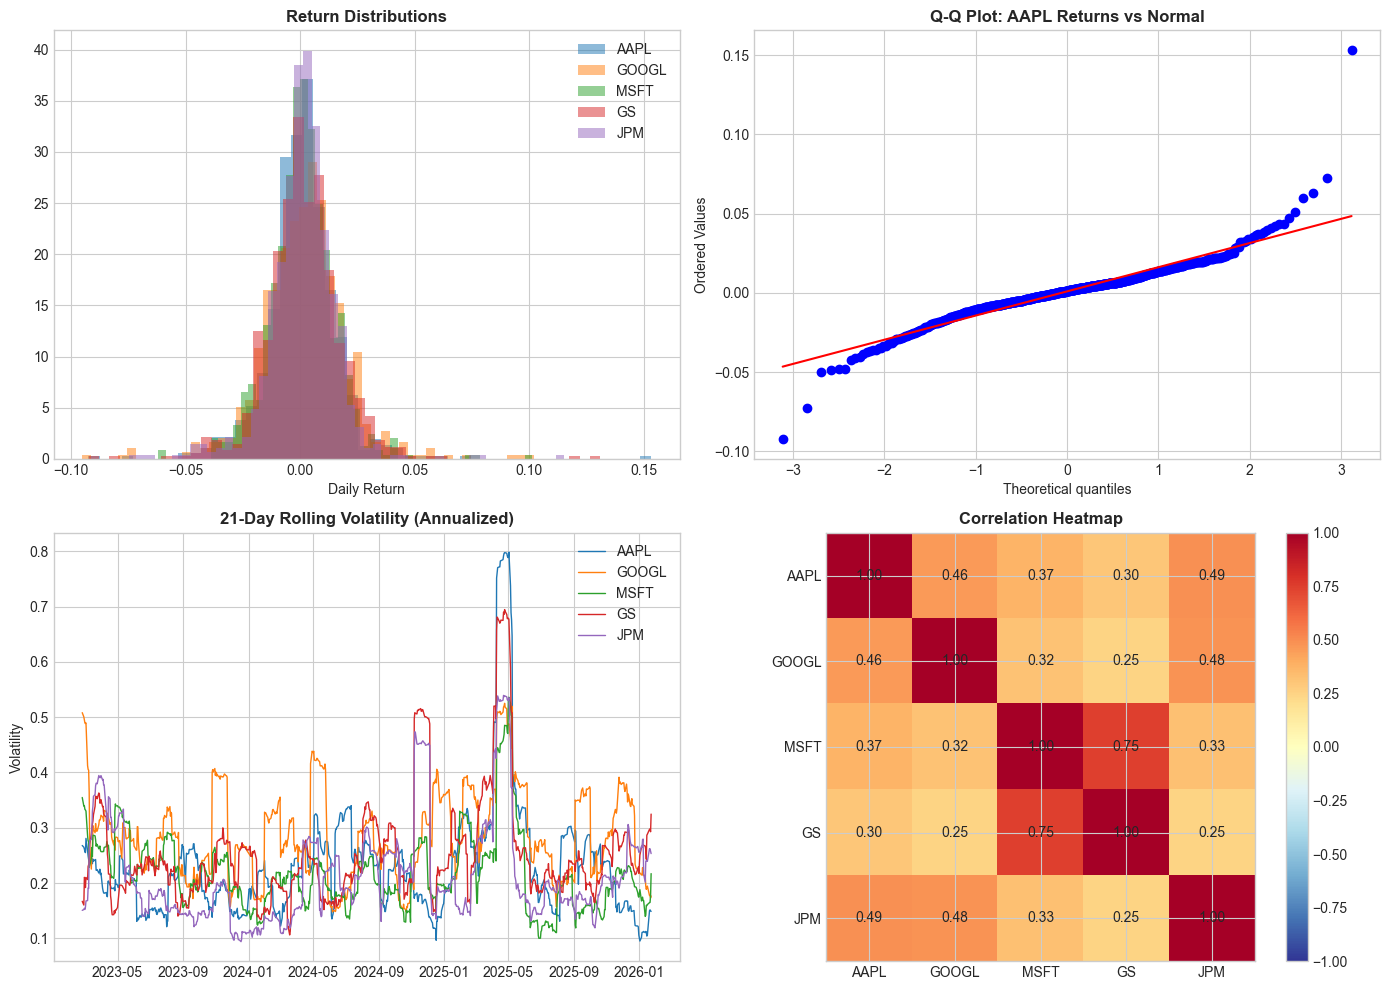


✅ Week 2 Project Complete!


In [6]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Return distributions
ax1 = axes[0, 0]
for stock in TICKERS:
    ax1.hist(returns[stock], bins=50, alpha=0.5, label=stock, density=True)
ax1.set_title('Return Distributions', fontweight='bold')
ax1.set_xlabel('Daily Return')
ax1.legend()

# QQ Plot (AAPL example)
ax2 = axes[0, 1]
stats.probplot(returns['AAPL'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot: AAPL Returns vs Normal', fontweight='bold')

# Rolling volatility
ax3 = axes[1, 0]
rolling_vol = returns.rolling(21).std() * np.sqrt(252)
for stock in TICKERS:
    ax3.plot(rolling_vol.index, rolling_vol[stock], label=stock, linewidth=1)
ax3.set_title('21-Day Rolling Volatility (Annualized)', fontweight='bold')
ax3.set_ylabel('Volatility')
ax3.legend()

# Correlation heatmap
ax4 = axes[1, 1]
im = ax4.imshow(corr, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax4.set_xticks(range(len(TICKERS)))
ax4.set_yticks(range(len(TICKERS)))
ax4.set_xticklabels(TICKERS)
ax4.set_yticklabels(TICKERS)
ax4.set_title('Correlation Heatmap', fontweight='bold')
for i in range(len(TICKERS)):
    for j in range(len(TICKERS)):
        ax4.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center')
plt.colorbar(im, ax=ax4)

plt.tight_layout()
plt.show()

print("\n✅ Week 2 Project Complete!")